In [2]:
import matplotlib.pyplot as plt
import numpy as np

**Вариант №9**

**Задание 3.1.9**

**Дана система уравнений Ax=b порядка n. Исследовать зависимость погрешности решения x от
погрешностей правой части системы b.**

In [175]:
A = np.ones([5,5])
for i in range(0,5):
    for k in range(0,5):
        A[i,k] = 3/(1 + 0.1*9*(i+1)*(k+1))**2
b = [9,9,9,9,9]
##решаем систему
x = np.linalg.solve(A, b)
##число обусловленности
c = np.linalg.cond(A)

delta = 10**(-10)

d = []
##Пошевелим свободные члены
for i in range(0,5):
    b_1 = b
    b_1[i] += delta
    x_1 = np.linalg.solve(A, b_1)
    d.append(np.linalg.norm(x - x_1, np.inf) / np.linalg.norm(x, np.inf))
    b_1 = b
print (d)

[2.1864997421947342e-13, 1.0923113885272985e-11, 7.7468607883923e-11, 1.269133029952753e-10, 1.1111798275676236e-11]


**Посчитаем погрешности и сравним их:**

In [173]:
print('Практическая погрешность:', d[np.argmax(d)])

Практическая погрешность: 1.269133029952753e-10


In [174]:
print('Теоретическая погрешность:',round(c * delta,4))

Теоретическая погрешность: 0.0083


**Теоретическая погрешность больше практической, т.к. является лишь оценкой.**

**Задание 3.5.3**

In [9]:
A = np.ones([30,30])
for i in range(0,30):
    for k in range(0,30):
        if i == k:
             A[i,k] = 30 + 81 + ((k+1)/9) + ((i+1)/30)
        else:
            A[i,k] = (i+k+2)/39
b = []
for i in range(0,30):
    b.append((i+1)**2 - 100)
b = np.array(b)   
##Найдем разложение Холецкого матрицы А    
L = np.linalg.cholesky(A) 

**Функции, реализующие обратный ход.**

In [3]:
def sum1(A, i, y):
    p = 0
    for k in range(0, i):
        p += A[i,k] * y[k]
    return p

def sum2(A, i, y, n):
    p = 0
    for k in range(i + 1, n):
        p += A[i,k] * y[n - 1 -k]
    return p
    
    
def obr_hod1(A, b, n):
    y = []
    y.append(b[0] / A[0,0])
    for i in range(1,n):
        y.append(1/A[i,i] * (b[i] - sum1(A, i, y)))
    y = np.array(y)
    return(y)

def obr_hod2(A, b, n):
    y = []
    y.append(b[n-1] / A[n-1,n-1])
    for i in range(1,n):
        y.append(1/A[n - 1 - i,n - 1 - i] * (b[n - 1 - i] - sum2(A, n - 1 - i, y, n)))
    y = np.array(y)
    return(y)
    
        
        
    

**Найдем решение $Ly = b.$**

In [19]:
y = obr_hod1(L, b,30)
y

array([-9.39055617, -9.09358969, -8.60141902, -7.91509934, -7.03599474,
       -5.9657682 , -4.70636938, -3.26002049, -1.62920036,  0.1833731 ,
        2.17476172,  4.34182706,  6.68125131,  9.18955876, 11.86313777,
       14.69826282, 17.69111659, 20.83781175, 24.13441235, 27.57695449,
       31.16146633, 34.88398711, 38.74058516, 42.72737481, 46.84053203,
       51.07630893, 55.43104685, 59.90118823, 64.48328714, 69.17401852])

In [20]:
##проверка
np.linalg.solve(L, b)

array([-9.39055617, -9.09358969, -8.60141902, -7.91509934, -7.03599474,
       -5.9657682 , -4.70636938, -3.26002049, -1.62920036,  0.1833731 ,
        2.17476172,  4.34182706,  6.68125131,  9.18955876, 11.86313777,
       14.69826282, 17.69111659, 20.83781175, 24.13441235, 27.57695449,
       31.16146633, 34.88398711, 38.74058516, 42.72737481, 46.84053203,
       51.07630893, 55.43104685, 59.90118823, 64.48328714, 69.17401852])

**Найдем решение $L^{T}x = y.$**

In [21]:
x = obr_hod2(L.T, y, 30)
x = x[::-1]
x

array([-1.19421606, -1.17628984, -1.14042087, -1.08665417, -1.01503464,
       -0.92560698, -0.81841578, -0.69350547, -0.55092032, -0.39070448,
       -0.21290192, -0.01755648,  0.19528813,  0.42558837,  0.67330083,
        0.93838226,  1.22078953,  1.52047967,  1.83740985,  2.17153737,
        2.52281968,  2.89121438,  3.27667918,  3.67917196,  4.09865073,
        4.53507363,  4.98839893,  5.45858506,  5.94559058,  6.44937417])

In [22]:
##проверка
np.linalg.solve(L.T, y)

array([-1.19421606, -1.17628984, -1.14042087, -1.08665417, -1.01503464,
       -0.92560698, -0.81841578, -0.69350547, -0.55092032, -0.39070448,
       -0.21290192, -0.01755648,  0.19528813,  0.42558837,  0.67330083,
        0.93838226,  1.22078953,  1.52047967,  1.83740985,  2.17153737,
        2.52281968,  2.89121438,  3.27667918,  3.67917196,  4.09865073,
        4.53507363,  4.98839893,  5.45858506,  5.94559058,  6.44937417])

**Задание 3.7**

**Реализация LU-разложения**

In [4]:
def sum3(A, B, i, j):
    p = 0
    for k in range(0,i):
        p += A[k,j] * B[i,k]
    return p

def sum4(A, B, i, j):
    p = 0
    for k in range(0,j):
        p += A[k,j] * B[i,k]
    return p
        
def LU_dec(A, n):
    
    L = np.zeros([n,n])
    U = np.zeros([n,n])
    
    for j in range(0,n):
        L[j,j] = 1.0
        
        for i in range(0, j+1):
            U[i,j] = A[i,j] - sum3(U,L, i, j)
        for i in range(j, n):
            L[i,j] = (A[i,j] - sum4(U,L, i, j)) / U[j,j]
            
    return (L, U)

In [5]:
def mk_matrix(n):
    A = np.ones([n,n])
    for i in range(0,n):
        for k in range(0,n):
            A[i,k] = 3/(1 + 0.1*9*(i+1)*(k+1))**2
    return A

**Вычисляем обратную матрицу**

In [6]:
def obr(A, n):
    A_inv = []
    U = LU_dec(A,n)[1]
    L = LU_dec(A,n)[0]
    E = np.eye(n)
    
    for x in E:
        y = obr_hod1(L, x, n)
        A_inv.append(obr_hod2(U, y, n)[::-1])
  
    return np.array(A_inv).transpose()

**Строим график**

In [13]:
cond = []
for i in range(1,6):
    cond.append(np.linalg.norm(obr(mk_matrix(i),i)) * np.linalg.norm(mk_matrix(i)))
cond

[0.9999999999999999,
 35.08523605831172,
 2583.2184792195235,
 359437.09807198594,
 82650307.7424044]

C:\Users\ledox\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


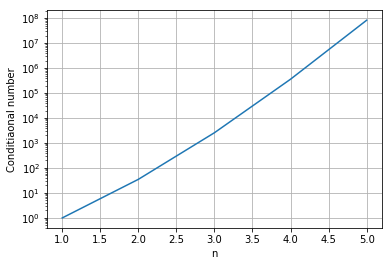

In [17]:
n = [1,2,3,4,5]
plt.plot(n, cond)
plt.xlabel('n')
plt.ylabel('Conditiaonal number')
plt.yscale('log')
plt.grid('True')